In [1]:
#helper
import tensorflow as tf


def reduce_logsumexp(input_tensor, reduction_indices=1, keep_dims=False):
  """Computes the sum of elements across dimensions of a tensor in log domain.

     It uses a similar API to tf.reduce_sum.

  Args:
    input_tensor: The tensor to reduce. Should have numeric type.
    reduction_indices: The dimensions to reduce. 
    keep_dims: If true, retains reduced dimensions with length 1.
  Returns:
    The reduced tensor.
  """
  max_input_tensor1 = tf.reduce_max(
      input_tensor, reduction_indices, keep_dims=keep_dims)
  max_input_tensor2 = max_input_tensor1
  if not keep_dims:
    max_input_tensor2 = tf.expand_dims(max_input_tensor2, reduction_indices)
  return tf.log(
      tf.reduce_sum(
          tf.exp(input_tensor - max_input_tensor2),
          reduction_indices,
          keep_dims=keep_dims)) + max_input_tensor1


def logsoftmax(input_tensor):
  """Computes normal softmax nonlinearity in log domain.

     It can be used to normalize log probability.
     The softmax is always computed along the second dimension of the input Tensor.     

  Args:
    input_tensor: Unnormalized log probability.
  Returns:
    normalized log probability.
  """
  return input_tensor - reduce_logsumexp(input_tensor, reduction_indices=0, keep_dims=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


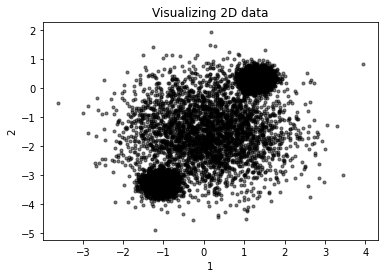

In [0]:
#kmeans
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Loading data
data = np.load('data2D.npy')
#data = np.load('data100D.npy')
[num_pts, dim] = np.shape(data) #10000, 2
#print(num_pts)
#print(dim) #D should be equal to dim

is_valid = 0
# For Validation set
if is_valid:
  valid_batch = int(num_pts / 3.0)
  np.random.seed(45689)
  rnd_idx = np.arange(num_pts)
  np.random.shuffle(rnd_idx)
  val_data = data[rnd_idx[:valid_batch]]
  data = data[rnd_idx[valid_batch:]]

"""   
k = len(cenVal)
plt.scatter(data[:, 0], data[:, 1], c=clustering, 
            cmap=plt.get_cmap('Set3'), s=25, alpha=0.6)
plt.scatter(cenVal[:, 0], cenVal[:, 1], marker='*', c="black", 
            cmap=plt.get_cmap('Set1'), s=50, linewidths=1)
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()
"""



#draw scatter plot
#https://pythonspot.com/matplotlib-scatterplot/
xx = data[:, 0]
yy = data[:, 1]
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(xx, yy, s=area, c=colors, alpha=0.5)
plt.title('Visualizing 2D data')
plt.xlabel('1')
plt.ylabel('2')
plt.show()


# Distance function for K-means
def distanceFunc(X, MU):
  # Inputs
  # X: is an NxD matrix (N observations and D dimensions)
  # MU: is an KxD matrix (K means and D dimensions)
  # Outputs
  # pair_dist: is the squared pairwise distance matrix (NxK)
  # TODO

  #I just realized that this is not looking for the minimum
  #What this function asks us to do is basically two for loops
  #Which is what I have in plain numpy-style code here
  #Note that np.matmul doesn't work because X is a tensor
  #And changing to tf.matmul doesn't work because tensors are not mutable
  #result = tf.matmul(X, tf.transpose(MU))
  #for i in range(X.shape[0]):
  #  for k in range(MU.shape[0]):
  #    result[i, k] = (X[i, :] - MU[k, :])**2

  #Following is the ingenious way to vectorize the for loop operation
  xx = tf.expand_dims(X, 0)  # 1 x N x D
  mu = tf.expand_dims(MU, 1) # K x 1 x D
  rs = tf.reduce_sum(tf.square(xx - mu), axis=2)
  return tf.transpose(rs)

tf.set_random_seed(421)

#y = tf.placeholder(tf.float32, [None, class_num])

K = 3
D = dim
N = num_pts
X = data

x = tf.placeholder(tf.float32, [N, D])
mu = tf.Variable(tf.truncated_normal(shape = [K, D], stddev = 0.5, dtype = tf.float32))

epochs = 500
optimizer = tf.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.99, epsilon=1e-5)
tr_cost = tf.reduce_sum(tf.reduce_min(distanceFunc(x, mu), axis=1))
optimizer = optimizer.minimize(tr_cost)

tr_loss = list()

with tf.Session() as sess:
  # initialize the variables
  init = tf.global_variables_initializer()
  sess.run(init)

  for i in range(epochs):
    feed_dict = {x: X}
    _, MU, t_loss = sess.run([optimizer, mu, tr_cost], feed_dict)
    tr_loss.append(t_loss)

  #This is to visualize the clusters
  clustering = sess.run(tf.argmin(distanceFunc(x, MU), axis=1), feed_dict={x:X})

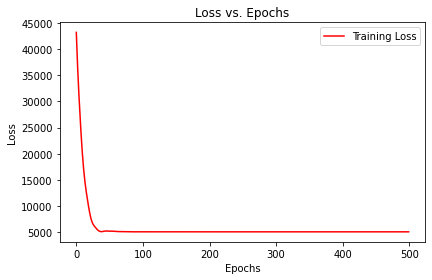

In [0]:
#The length is simply epochs
l = range(epochs)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("Loss vs. Epochs")
plt.tight_layout()
plt.plot(l, tr_loss, label = "Training Loss", color = "red")
plt.legend()
plt.show()

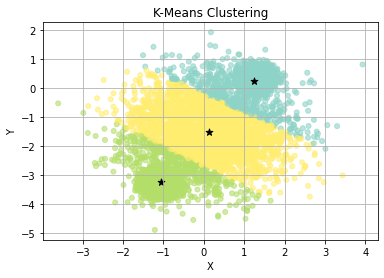

In [0]:
#clustering = sess.run(tf.argmin(distanceFunc(x, MU), axis=1), feed_dict={x:X})
#clustering = tf.argmin(distanceFunc(X, MU), axis=1)

k = len(MU)
plt.scatter(data[:, 0], data[:, 1], c=clustering, 
            cmap=plt.get_cmap('Set3'), s=25, alpha=0.6)
plt.scatter(MU[:, 0], MU[:, 1], marker='*', c="black", 
            cmap=plt.get_cmap('Set1'), s=50, linewidths=1)
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

iteration: 0 loss 39016.758
iteration: 10 loss 37190.742
iteration: 20 loss 35328.61
iteration: 30 loss 33485.234
iteration: 40 loss 31746.092
iteration: 50 loss 30132.977
iteration: 60 loss 28642.293
iteration: 70 loss 27255.422
iteration: 80 loss 25954.014
iteration: 90 loss 24726.729
iteration: 100 loss 23566.924
iteration: 110 loss 22471.477
iteration: 120 loss 21438.283
iteration: 130 loss 20463.338
iteration: 140 loss 19542.844
iteration: 150 loss 18671.943
iteration: 160 loss 17825.707
iteration: 170 loss 16883.057
iteration: 180 loss 14309.641
iteration: 190 loss 11766.016
iteration: 200 loss 10073.245
iteration: 210 loss 8868.271
iteration: 220 loss 7946.873
iteration: 230 loss 7205.5547
iteration: 240 loss 6590.078
iteration: 250 loss 6067.559
iteration: 260 loss 5616.917
iteration: 270 loss 5225.076
iteration: 280 loss 4881.0854
iteration: 290 loss 4577.2393
iteration: 300 loss 4307.9653
iteration: 310 loss 4068.1912
iteration: 320 loss 3854.9575
iteration: 330 loss 3664.021

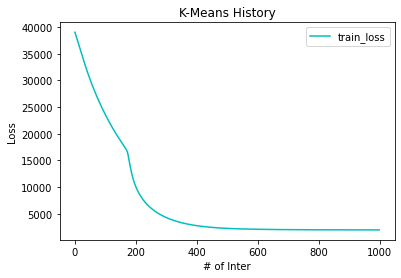

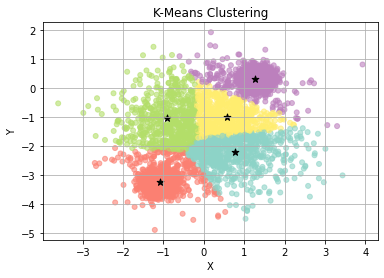

iteration: 0 loss 38845.67
iteration: 10 loss 36861.625
iteration: 20 loss 34982.832
iteration: 30 loss 33213.4
iteration: 40 loss 31551.578
iteration: 50 loss 29990.0
iteration: 60 loss 28487.459
iteration: 70 loss 26797.873
iteration: 80 loss 25217.893
iteration: 90 loss 23878.674
iteration: 100 loss 22623.057
iteration: 110 loss 21325.734
iteration: 120 loss 20051.016
iteration: 130 loss 18710.582
iteration: 140 loss 15911.629
iteration: 150 loss 13468.043
iteration: 160 loss 11733.856
iteration: 170 loss 10426.044
iteration: 180 loss 9382.342
iteration: 190 loss 8512.45
iteration: 200 loss 7721.735
iteration: 210 loss 6877.9497
iteration: 220 loss 6113.8667
iteration: 230 loss 5496.2085
iteration: 240 loss 4998.3643
iteration: 250 loss 4581.818
iteration: 260 loss 4220.1133
iteration: 270 loss 3906.2246
iteration: 280 loss 3629.8154
iteration: 290 loss 3387.5518
iteration: 300 loss 3174.1582
iteration: 310 loss 2985.3318
iteration: 320 loss 2815.5115
iteration: 330 loss 2663.0408
i

KeyboardInterrupt: ignored

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp


def assign_data(X, MU):

    dists = distanceFunc(X, MU) 
    min_dist = tf.argmin(dists, 1)  
    return min_dist

# Distance function for K-means
def distanceFunc(X, MU):
    # Inputs
    # X: is an NxD matrix (N observations and D dimensions)
    # MU: is an KxD matrix (K means and D dimensions)
    # Outputs
    # pair_dist: is the pairwise distance matrix (NxK)
    #y = np.power((X[:, np.newaxis] - MU), 2)
    #newY = tf.convert_to_tensor(y, dtype=tf.float32)
    #output = np.sum(y, axis=2)
    newX = tf.expand_dims(X,0)
    newMU = tf.expand_dims(MU, 1)
    dis = tf.reduce_sum(tf.square(tf.subtract(newX,newMU)),2)
    output = tf.transpose(dis)
    return output

  
  
def k_means(k, is_validm = False):
# Loading data
    data = np.load('data2D.npy')
    #data = np.load('data100D.npy')
    [num_pts, dim] = np.shape(data)

    # For Validation set
    is_valid = is_validm
    if is_valid:
        valid_batch = int(num_pts / 3.0)
        np.random.seed(45689)
        rnd_idx = np.arange(num_pts)
        np.random.shuffle(rnd_idx)
        val_data = data[rnd_idx[:valid_batch]]
        data = data[rnd_idx[valid_batch:]]

    #graph = tf.Graph()
    #with graph.as_default():
    loss_history = np.empty(shape=[0],dtype=float)
    val_loss_history = []
    K = k
    N = num_pts
    D = dim
    inter = 1000

    X = tf.placeholder("float", shape=[None,D])
    MU_init = tf.truncated_normal([K,D],stddev=0.05)
    MU = tf.Variable(MU_init)

    distance = distanceFunc(X,MU)
    #centroid = np.power(distance,2)
    #loss = np.sum(np.amin(distance, axis=1))
    loss = tf.reduce_sum(tf.reduce_min(distance,axis = 1))
    optimizer = tf.train.AdamOptimizer(
        learning_rate=0.003).minimize(loss)

    init_g = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init_g)

    for step in range(inter):
        cenVal,lossVal,_ = sess.run([MU,loss,optimizer], feed_dict={X:data})
        
        loss_history = np.append(loss_history,lossVal)
        if is_valid:
            val_cenVal,val_lossVal,_ = sess.run([MU,loss,optimizer], feed_dict={X:val_data})
            val_loss_history = np.append(val_loss_history,val_lossVal)
        if step%10 ==0:
            print("iteration:", step, "loss", lossVal)
    clustering = sess.run(assign_data(X, MU),feed_dict={X: data, MU:cenVal})
    print("Final Training loss", loss_history[-1])
#     print("Final Validation loss", val_loss_history[-1])
    percentages = np.zeros(K)
#     for i in range(K):
#              percentages[i] = np.sum(np.equal(i, clustering))*100.0/len(clustering)
#              print("class:", i, "percentage:", percentages[i])
    plt.figure(1)
    plt.plot(range(len(loss_history)),loss_history,c="c", label="train_loss")
#     plt.plot(range(len(val_loss_history)),loss_history,c="b", label="validation_loss")
    plt.legend(loc = "best")
    plt.title('K-Means History')
    plt.xlabel('# of Inter')
    plt.ylabel('Loss')
    plt.show()

    k = len(cenVal)
    plt.scatter(data[:, 0], data[:, 1], c=clustering, 
                cmap=plt.get_cmap('Set3'), s=25, alpha=0.6)
    plt.scatter(cenVal[:, 0], cenVal[:, 1], marker='*', c="black", 
                cmap=plt.get_cmap('Set1'), s=50, linewidths=1)
    plt.title('K-Means Clustering')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.show()
    return val_loss_history




if __name__ == "__main__":
    
    valid = []
    valid.append(k_means(5, True))
    valid.append(k_means(10, True))
    valid.append(k_means(15, True))
    valid.append(k_means(20, True))
    valid.append(k_means(25, True))
    valid.append(k_means(30, True))
    

plt.figure(1)
plt.plot(range(len(valid[0])),valid[0],c="r", label="K = 5")
# plt.plot(range(len(valid_losses)),valid_losses,c="r", label="valid_loss")
plt.plot(range(len(valid[1])),valid[1],c="g", label="K = 10")
plt.plot(range(len(valid[2])),valid[2],c="b", label="K = 15")
plt.plot(range(len(valid[3])),valid[3],c="m", label="K = 20")
plt.plot(range(len(valid[4])),valid[4],c="y", label="K = 25")
plt.plot(range(len(valid[5])),valid[5],c="c", label="K = 30")
plt.legend(loc = "best")
plt.title('Validation loss with different K, using K_means')
plt.xlabel('# of Inter')
plt.ylabel('Loss')
plt.show()

In [0]:
#Compute validation loss
print(tf.reduce_sum(distanceFunc(val_data, mu).argmin(axis=0)))

In [0]:
#gmm
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Loading data
#data = np.load('data100D.npy')
data = np.load('data2D.npy')
[num_pts, dim] = np.shape(data)

"""
# For Validation set
if is_valid:
  valid_batch = int(num_pts / 3.0)
  np.random.seed(45689)
  rnd_idx = np.arange(num_pts)
  np.random.shuffle(rnd_idx)
  val_data = data[rnd_idx[:valid_batch]]
  data = data[rnd_idx[valid_batch:]]
"""

# Distance function for GMM
def distanceFunc(X, MU):
    # Inputs
    # X: is an NxD matrix (N observations and D dimensions)
    # MU: is an KxD matrix (K means and D dimensions)
    # Outputs
    # pair_dist: is the pairwise distance matrix (NxK)
    # TODO

    newX = tf.expand_dims(X, 0)
    newMU = tf.expand_dims(MU, 1)
    dis = tf.reduce_sum(tf.square(tf.subtract(newX, newMU)), 2)
    output = tf.transpose(dis)
    return output

def log_GaussPDF(X, mu, sigma):
    # Inputs
    # X: N X D
    # mu: K X D
    # sigma: K X 1

    # Outputs:
    # log Gaussian PDF N X K

    # TODO
    """
    result = np.matmul(X, np.transpose(mu))
    for i in result.shape[0]:
      result[i, :] = (-1.0)*tf.reduce_sum((X[i, :] - mu)**2, axis=0) / 2 / np.transpose(sigma) - 0.5*np.log(2*np.pi*(sigma**2))
    return result
    """
    dim = tf.to_float(tf.rank(X))
    xmu = distanceFunc(X,mu)
    xmuSqu = tf.multiply(xmu,xmu)
    sigma = tf.squeeze(sigma)
    coef = tf.log(2 * np.pi * sigma)
    exp = xmu / (2 * sigma)
    mul = -0.5*dim * coef
    PDF = mul - exp
    return PDF

def log_posterior(log_PDF, log_pi):
    # Input
    # log_PDF: log Gaussian PDF N X K
    # log_pi: K X 1

    # Outputs
    # log_post: N X K

    # TODO

    #return log_PDF + log_pi - reduce_logsumexp(log_PDF + log_pi)

    log_pi = tf.squeeze(log_pi)
    log_prob = tf.add(log_pi,log_PDF)
    log_sum = reduce_logsumexp(log_prob + log_pi,keep_dims=True)
    output = log_prob - log_sum
    return output

K = 3
D = dim
N = num_pts
X = data

x = tf.placeholder(tf.float32, [N, D])
mu = tf.Variable(tf.truncated_normal(shape = [K, D], stddev = 0.5, dtype = tf.float32))

epochs = 500
#optimizer = tf.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.99, epsilon=1e-5)
#tr_cost = tf.reduce_sum(tf.reduce_min(distanceFunc(x, mu), axis=1))
#optimizer = optimizer.minimize(tr_cost)
#WHY??
#tr_cost = (-1.0)*reduce_logsumexp(np.exp(log_PDF + log_pi))
dummy_one = tf.Variable(tf.truncated_normal(shape = [K, 1], stddev = 0.5)) #Where exp(dummy1) = variance
sigma = tf.exp(dummy_one)
log_PDF = log_GaussPDF(x, mu, sigma)
dummy_two = tf.Variable(tf.truncated_normal(shape = [K, 1], stddev = 0.5)) #Where log_pi = logsoftmax(dummy2)
log_pi = tf.squeeze(logsoftmax(dummy_two)) #squeeze?


# reduce the total loss
tr_cost   = (-1.0)*tf.reduce_sum(reduce_logsumexp(log_PDF + log_pi, keep_dims=True))
optimizer = tf.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.99, epsilon=1e-5)
optimizer = optimizer.minimize(tr_cost)

tr_loss = list()

pred = tf.argmax(tf.nn.softmax(log_posterior(log_PDF, log_pi)), 1)
with tf.Session() as sess:
  # initialize the variables
  init = tf.global_variables_initializer()
  sess.run(init)

  for i in range(epochs):
    feed_dict = {x: X}
    _, MU, t_loss = sess.run([optimizer, mu, tr_cost], feed_dict)
    tr_loss.append(t_loss)

  #This is to visualize the clusters
  clustering = sess.run((pred), feed_dict={x:X})

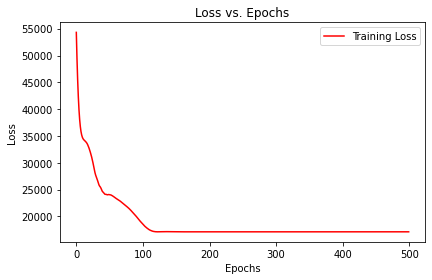

In [8]:
#The length is simply epochs
l = range(epochs)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("Loss vs. Epochs")
plt.tight_layout()
plt.plot(l, tr_loss, label = "Training Loss", color = "red")
plt.legend()
plt.show()

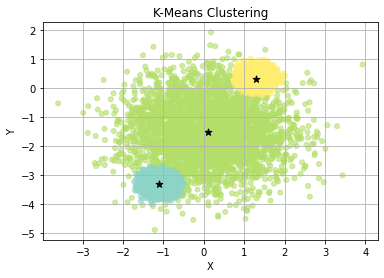

In [9]:
#clustering = sess.run(tf.argmin(distanceFunc(x, MU), axis=1), feed_dict={x:X})
#clustering = tf.argmin(distanceFunc(X, MU), axis=1)

k = len(MU)
plt.scatter(data[:, 0], data[:, 1], c=clustering, 
            cmap=plt.get_cmap('Set3'), s=25, alpha=0.6)
plt.scatter(MU[:, 0], MU[:, 1], marker='*', c="black", 
            cmap=plt.get_cmap('Set1'), s=50, linewidths=1)
plt.title('GMM')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

K = 5, Final loss: 12175.203125
Cluster 0: 22.78%
Cluster 1: 0.0%
Cluster 2: 16.14%
Cluster 3: 22.93%
Cluster 4: 4.82%


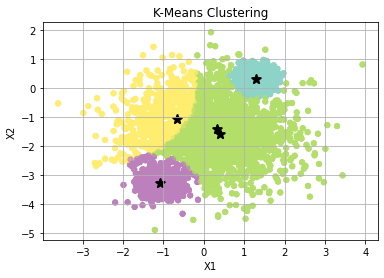

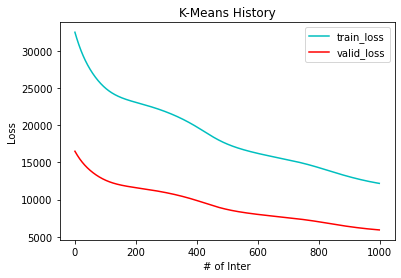

K = 10, Final loss: 11521.1435546875
Cluster 0: 0.0%
Cluster 1: 22.76%
Cluster 2: 0.0%
Cluster 3: 0.0%
Cluster 4: 0.0%
Cluster 5: 0.0%
Cluster 6: 22.15%
Cluster 7: 0.0%
Cluster 8: 0.0%
Cluster 9: 21.76%


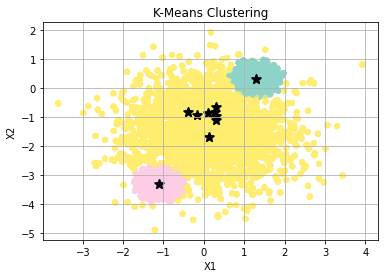

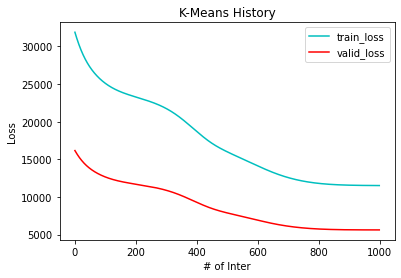

K = 15, Final loss: 11510.6865234375
Cluster 0: 0.0%
Cluster 1: 0.0%
Cluster 2: 22.85%
Cluster 3: 0.0%
Cluster 4: 0.0%
Cluster 5: 2.11%
Cluster 6: 0.0%
Cluster 7: 0.0%
Cluster 8: 0.0%
Cluster 9: 0.07%
Cluster 10: 19.45%
Cluster 11: 0.0%
Cluster 12: 22.16%
Cluster 13: 0.03%
Cluster 14: 0.0%


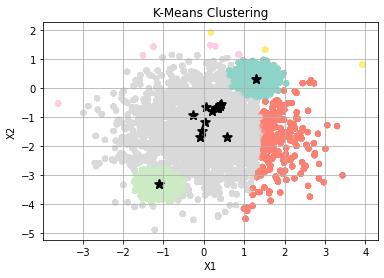

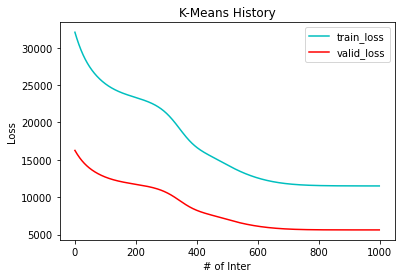

KeyboardInterrupt: ignored

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp
from collections import Counter

def distanceFunc(X, MU):
    # Inputs
    # X: is an NxD matrix (N observations and D dimensions)
    # MU: is an KxD matrix (K means and D dimensions)
    # Outputs
    # pair_dist: is the pairwise distance matrix (NxK)
    newX = tf.expand_dims(X, 0)
    newMU = tf.expand_dims(MU, 1)
    dis = tf.reduce_sum(tf.square(tf.subtract(newX, newMU)), 2)
    output = tf.transpose(dis)
    return output

def log_GaussPDF(X, mu, sigma):
    # Inputs
    # X: N X D
    # mu: K X D
    # sigma: K X 1
    # log_pi: K X 1

    # Outputs:
    # log Gaussian PDF N X K
    dim = tf.to_float(tf.rank(X))
    xmu = distanceFunc(X,mu)
    xmuSqu = tf.multiply(xmu,xmu)
    sigma = tf.squeeze(sigma)
    coef = tf.log(2 * np.pi * sigma)
    exp = xmu / (2 * sigma)
    mul = -0.5*dim * coef
    PDF = mul - exp
    return PDF

    

def log_posterior(log_PDF, log_pi):
    # Input
    # log_PDF: log Gaussian PDF N X K
    # log_pi: K X 1

    # Outputs
    # log_post: N X K
    log_pi = tf.squeeze(log_pi)
    log_prob = tf.add(log_pi,log_PDF)
    log_sum = reduce_logsumexp(log_prob + log_pi,keep_dims=True)
    output = log_prob - log_sum
    return output

    
def kmeans(K, is_valid=False):
  
    # Loading data
    data = np.load('data2D.npy')
    #data = np.load('data100D.npy')
    [N, D] = np.shape(data)


    #plt.scatter(data.T[0], data.T[1])
    # For Validation set
    if is_valid:
        valid_batch = int(N / 3.0)
        np.random.seed(45689)
        rnd_idx = np.arange(N)
        np.random.shuffle(rnd_idx)
        val_data = data[rnd_idx[:valid_batch]]
        data = data[rnd_idx[valid_batch:]]

    np.random.seed(521)

    num_ep = 1000
    losses = []
    assg = []
    valid_losses = []
    
    learning_rate = 0.003
    s_stddev=0.05
    X = tf.placeholder("float", [None, D], "X")
    mu = tf.Variable(tf.random_normal([K, D], stddev = s_stddev)) 
    sigma = tf.Variable(tf.random_normal([K, 1], stddev = s_stddev))
    sigma = tf.exp(sigma)
    log_PDF = log_GaussPDF(X, mu, sigma) 

    initial_pi = tf.Variable(tf.random_normal([K, 1], stddev = s_stddev))
    log_pi = tf.squeeze(logsoftmax(initial_pi))

    # reduce the total loss
    loss = - tf.reduce_sum(reduce_logsumexp(log_PDF + log_pi, 1, keep_dims=True))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train = optimizer.minimize(loss)

    # determine the clusters
    pred = tf.argmax(tf.nn.softmax(log_posterior(log_PDF, log_pi)), 1)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.local_variables_initializer())

        for i in range(num_ep):
            cenVal, cur_l, _, assg = sess.run([mu, loss, train, pred], feed_dict={X:data})
            losses.append(cur_l)
#             if i%10 ==0:
#                 print("iteration:", i, "loss", cur_l)
            if is_valid:
                _, valid_loss, _, _ = sess.run([mu, loss, train, pred], feed_dict={X: val_data})
                valid_losses.append(valid_loss)

        print("K = {}, Final loss: {}".format(K, losses[-1]))
        clusters = Counter(assg)
        assg=np.int32(assg)
        for i in range(K):
            print("Cluster {}: {}%".format(i, clusters[i]*100.0/N))
            plt.scatter(data[:, 0], data[:, 1], c=assg, cmap=plt.get_cmap('Set3'), s=25, alpha=0.6)
        plt.scatter(cenVal[:, 0], cenVal[:, 1], marker='*', c="black", cmap=plt.get_cmap('Set1'), s=80, linewidths=2)
        plt.title('K-Means Clustering')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.grid()
        plt.show()

        

#     if is_valid:
#         print("K = {}, Validation loss: {}".format(K, valid_loss))

    plt.figure(1)
    plt.plot(range(len(losses)),losses,c="c", label="train_loss")
    plt.plot(range(len(valid_losses)),valid_losses,c="r", label="valid_loss")
    plt.legend(loc = "best")
    plt.title('K-Means History')
    plt.xlabel('# of Inter')
    plt.ylabel('Loss')
    plt.show()
    
    return valid_losses


if __name__ == "__main__":
    
    valid = []
    valid.append(kmeans(5, True))
    valid.append(kmeans(10, True))
    valid.append(kmeans(15, True))
    valid.append(kmeans(20, True))
    valid.append(kmeans(25, True))
    valid.append(kmeans(30, True))

plt.figure(1)
plt.plot(range(len(valid[0])),valid[0],c="r", label="K = 5")
# plt.plot(range(len(valid_losses)),valid_losses,c="r", label="valid_loss")
plt.plot(range(len(valid[1])),valid[1],c="g", label="K = 10")
plt.plot(range(len(valid[2])),valid[2],c="b", label="K = 15")
plt.plot(range(len(valid[3])),valid[3],c="m", label="K = 20")
plt.plot(range(len(valid[4])),valid[4],c="y", label="K = 25")
plt.plot(range(len(valid[5])),valid[5],c="c", label="K = 30")
plt.legend(loc = "best")
plt.title('Validation loss with different K, using data100D')
plt.xlabel('# of Inter')
plt.ylabel('Loss')
plt.show()